<a href="https://colab.research.google.com/github/dzeke/ColoradoRiverCollaborate/blob/main/Powell10year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lake Powell Inflows, Releases, and Evaporation
## David E. Rosenberg
## February 6, 2024

## Overview
This is a Google Collaborate file (.ipynb)t. This document reads daily USBR data on Lake Powell Inflows and
Releases (https://www.usbr.gov/uc/water/hydrodata/reservoir_data/919/dashboard.html#storage/). The code aggregates data to yearly (water
year starting Oct 1), 9-year, and decadal values and then compares Lake Powell releases to The 1922 Compact
Article 3(d) requirement. The document also shows histograms of Powell inflows and realeases.

 + 10-year 75 maf requirement: Upper Basin delivers to Lower Basin by Article 3(d) of 1922 Compact

 + 10-year 82.3 maf requirement: Upper Basin delivers to Lower Basin by 1922 Compact Article 3(d) and half of 1.5 maf per year United States obligation to Mexico by 1944 Treaty.

 + Presently, the Upper Basin’s 0.75 maf per year obligation to Mexico may be revised down by contigency plans in Minutes 319 and 323 to US-Mexico Treaty.

 + 9-Year target is used to show Upper Basin flexibility to allow inflow to pass to Lower Basin in current 10th year.

## Requested Citation
David E. Rosenberg (2021), “Lake Powell Inflows and Releases.” Utah State University. Logan, Utah.
https://github.com/dzeke/ColoradoRiverFutures/tree/master/Powell10year.

## Test Code

Pandas cheat sheet at https://pandas.pydata.org/docs/user_guide/10min.html.

In [3]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
#from plotnine import *
#from plotnine.data import mpg
%matplotlib inline

# Load the data from a csv file on Github
EvapDataAsUrl = 'https://raw.githubusercontent.com/dzeke/ColoradoRiverCollaborate/main/Powell10year/AsPython/25.csv'
# Load the data from Reclamation's webservice
EvapDataAsUrl = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/919/csv/25.csv'
# Move the Dataset into a Pandas Dataframe
dfEvap = pd.read_csv(EvapDataAsUrl)
# Read the number of rows
nRows = len(dfEvap)

# Convert the datetime object column to pandas date time
dfEvap['date'] = pd.to_datetime(dfEvap['datetime'])

#print(dfEvap.dtypes)
#print(dfEvap.index)
#print(f"Number of rows = ",nRows)

#rng = pd.date_range("1/1/2012", periods=100, freq="s")

#Add year and month columns
dfEvap['year'] = pd.DatetimeIndex(dfEvap['date']).year
dfEvap['month'] = pd.DatetimeIndex(dfEvap['date']).month

#Calculate the water year, Increment by 1 year, Months 10, 11, 12
dfEvap['wateryear'] = dfEvap['year']
dfEvap.loc[dfEvap['month'] >= 10, 'wateryear'] = dfEvap['year'] + 1

#Calculate total evaporation for each water year
#dfEvapWaterYear = dfEvap.groupby(['wateryear'], sort=True)['evaporation'].sum()/1e6
dfEvapWaterYear = dfEvap.groupby('wateryear').sum().reset_index()
# Turn acre-feet into million acre-feet
dfEvapWaterYear.evaporation = dfEvapWaterYear.evaporation / 1e6
# convert back to a dataframe
dfEvapWaterYear = pd.DataFrame(dfEvapWaterYear)
print()
print(dfEvapWaterYear.dtypes)
print(dfEvapWaterYear)

#dfEvapWaterYear['date'] = pd.to_datetime(dfEvapWaterYear['wateryear'])




wateryear        int64
evaporation    float64
year             int64
month            int64
dtype: object
    wateryear  evaporation    year  month
0        1963     0.000000  394563   1244
1        1964     0.073775  718732   2384
2        1965     0.166053  717133   2382
3        1966     0.216575  717498   2382
4        1967     0.191975  717863   2382
..        ...          ...     ...    ...
57       2020     0.372178  739228   2384
58       2021     0.276792  737573   2382
59       2022     0.203151  737938   2382
60       2023     0.230010  738303   2382
61       2024     0.073530  273148   1067

[62 rows x 4 columns]


# Figure 1. Annual Lake Powell Evaporation

NameError: name 'ggplot' is not defined

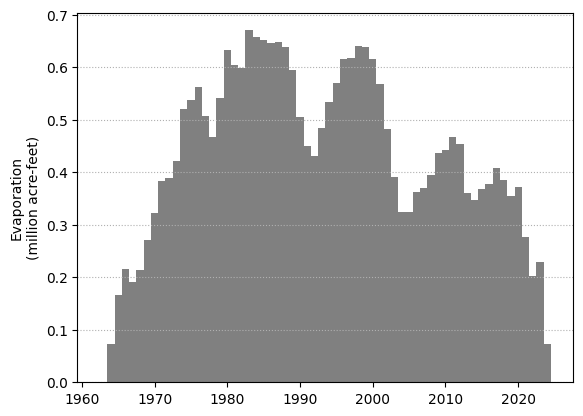

In [4]:
# Use matplotlib

import matplotlib.pyplot as plt

plt.bar(dfEvapWaterYear.wateryear, dfEvapWaterYear.evaporation, color = "grey", width = 1)
plt.xlabel('')
plt.ylabel('Evaporation\n(million acre-feet)')
plt.grid(axis = 'y', linestyle = "dotted")

#Use ggplot
(ggplot(dfEvapWaterYear, aes(x = 'wateryear'))
  + geom_bar(aes(y='evaporation'), color = "grey", fill = "grey", stat="identity")
 # geom_line(aes(y=OneYearRelease, group = 1, color="Release"), size=2) +
#  + scale_color_manual("", values = "grey50")
#  + scale_fill_manual("", values = "grey50")
  + labs(x="", y="Evaporation\n(million acre-feet per year)")

 # + theme(text = element_text(size=20), legend.title=element_blank(), legend.text=element_text(size=18),
#        legend.key = element_blank())
  )


# Figure 2. Evaporation each consecutive 10-years

    wateryear  evaporation    year  month  10yrEvap  Evap10yr
0        1963     0.000000  394563   1244       NaN       NaN
1        1964     0.073775  718732   2384       NaN       NaN
2        1965     0.166053  717133   2382       NaN       NaN
3        1966     0.216575  717498   2382       NaN       NaN
4        1967     0.191975  717863   2382       NaN       NaN
..        ...          ...     ...    ...       ...       ...
57       2020     0.372178  739228   2384  3.899504  3.899504
58       2021     0.276792  737573   2382  3.709059  3.709059
59       2022     0.203151  737938   2382  3.457226  3.457226
60       2023     0.230010  738303   2382  3.326326  3.326326
61       2024     0.072181  258980   1053  3.051334  3.051334

[62 rows x 6 columns]


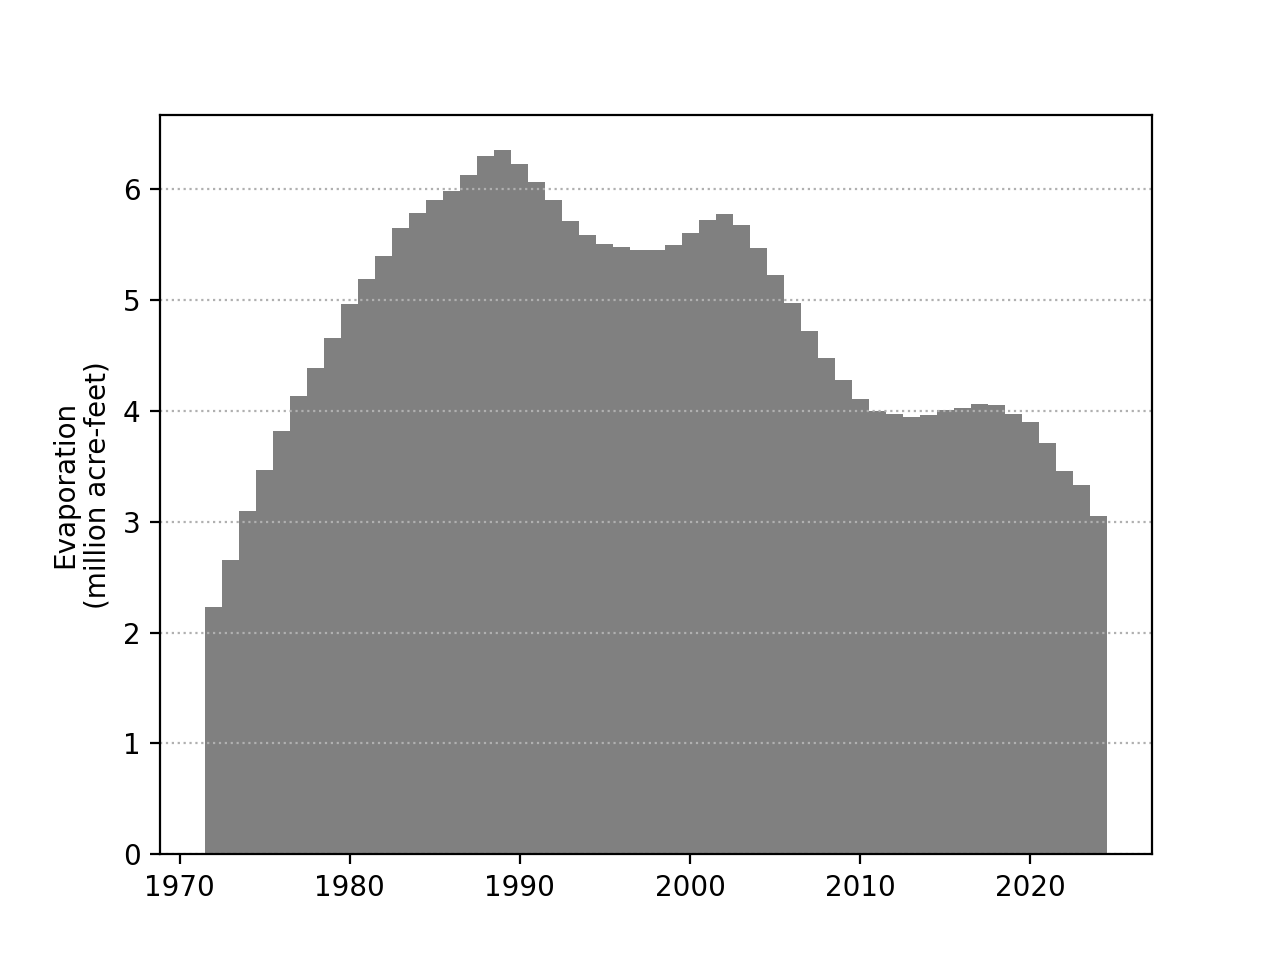

In [82]:
# Calculate a rolling sum
dfEvap10year = dfEvapWaterYear
dfEvap10year["Evap10yr"] = dfEvap10year['evaporation'].rolling(10).sum()

print(dfEvap10year)

plt.bar(dfEvap10year.wateryear, dfEvap10year.Evap10yr, color = "grey", width = 1)
plt.xlabel('')
plt.ylabel('10-Year Evaporation\n(million acre-feet)')
plt.grid(axis = 'y', linestyle = "dotted")